# Machine Learning Unsupervised Learning 1
## Individual Assignment - 1
#### Curated by: Paritosh Sinha

###### Importing the packages

In [2]:
import pandas as pd
import matplotlib.pylab as plt 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np
import threadpoolctl
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch

###### Importing the csv file

In [3]:
airlineDataData = pd.read_csv("EastWestairlineDatasCluster-updated.csv", delimiter=',')
airlineDataData.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
airlineDataData.drop(airlineDataData.columns[[0,]], axis=1, inplace=True) #Dropping #ID
airlineDataData.head()    

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


###### EDA on the Dataset

In [4]:
#Checking for the missing values in the dataset
airlineDataDataDataData.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [5]:
#Summary of dataframe
airlineDataData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [6]:
#Statistical Summary of the dataset
airlineData.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


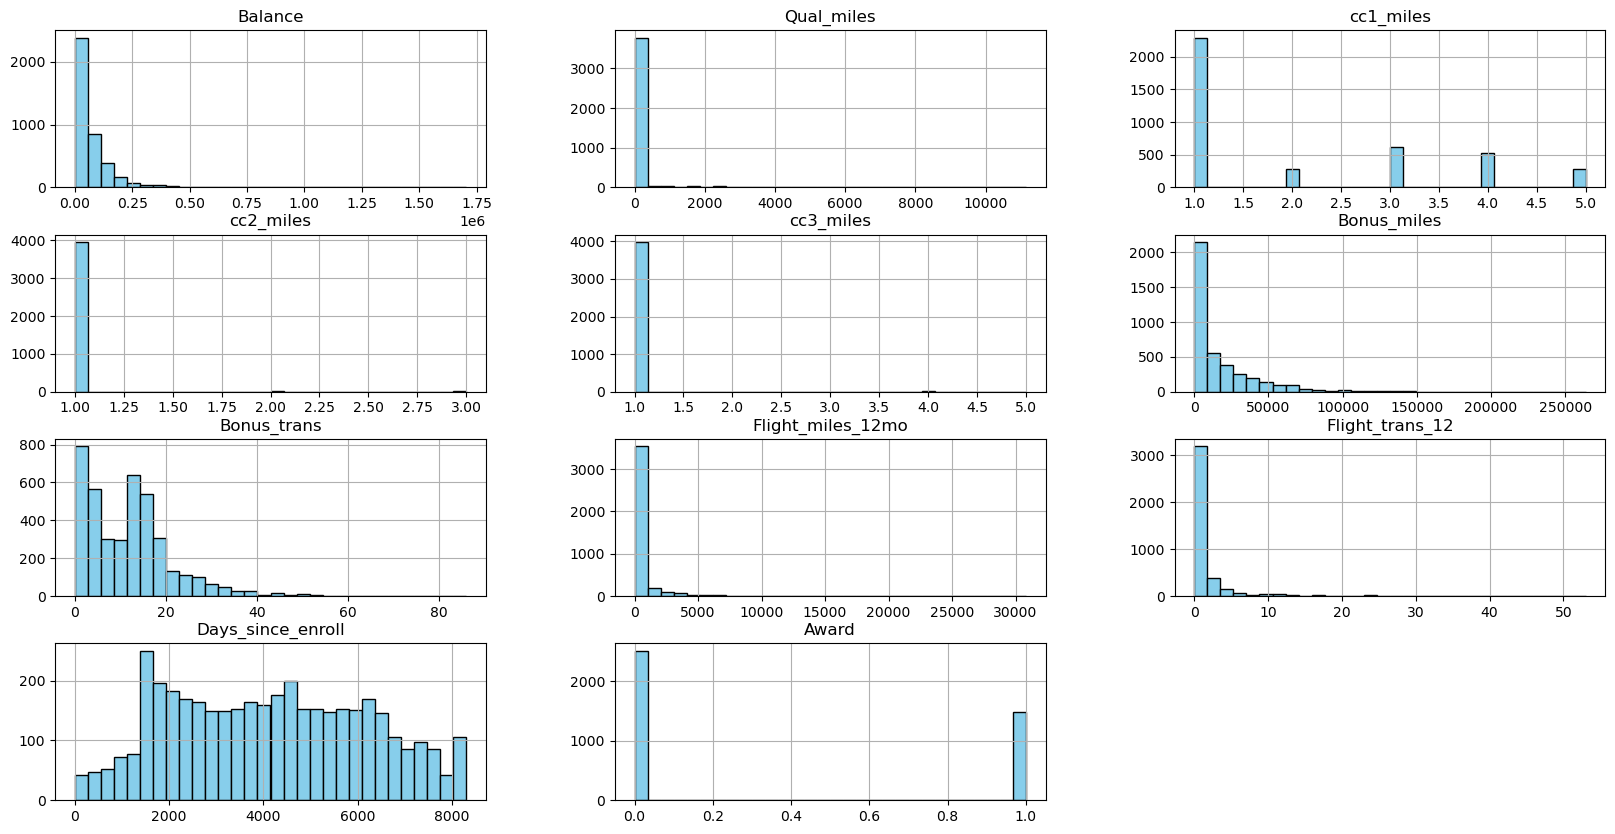

In [7]:
#Checking Distribution
airlineData.hist(figsize=(20,10),bins=30, color='skyblue', edgecolor='black')
plt.show()

In [8]:
airlineData.cc1_miles.value_counts()

1    2289
3     613
4     525
5     288
2     284
Name: cc1_miles, dtype: int64

In [9]:
airlineData.cc2_miles.value_counts()

1    3956
2      28
3      15
Name: cc2_miles, dtype: int64

In [10]:
airlineData.cc3_miles.value_counts()

1    3981
4       6
5       5
3       4
2       3
Name: cc3_miles, dtype: int64

In [11]:
airlineData.Award.value_counts()

0    2518
1    1481
Name: Award, dtype: int64

#### Answer a

###### Without Scaling the Data

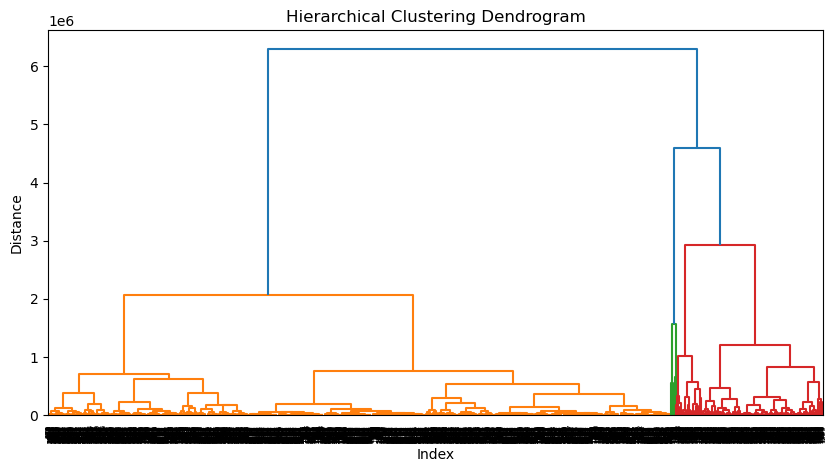

In [5]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(airlineData, method='ward',metric='euclidean'))

#### Answer b

###### Scaling data using sklearn MinMax Scaler

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(airlineData)
print("Standardized Data = ", scaled_data)

Standardized Data =  [[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


###### Putting Standardized data in a dataframe

In [13]:
airlineData_scaled = pd.DataFrame(scaled_data,columns= airlineData.columns)

In [14]:
airlineData_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


###### Creating the dendrogram using the standardized data generated

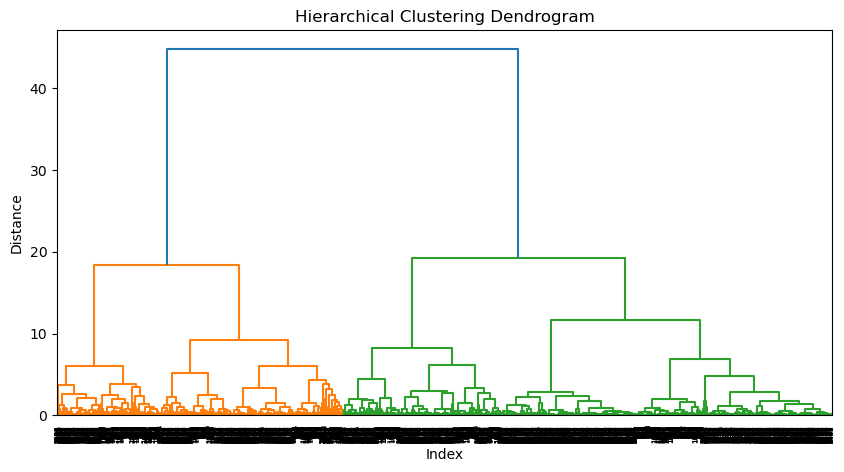

In [16]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(airlineData_scaled, method='ward',metric='euclidean'))

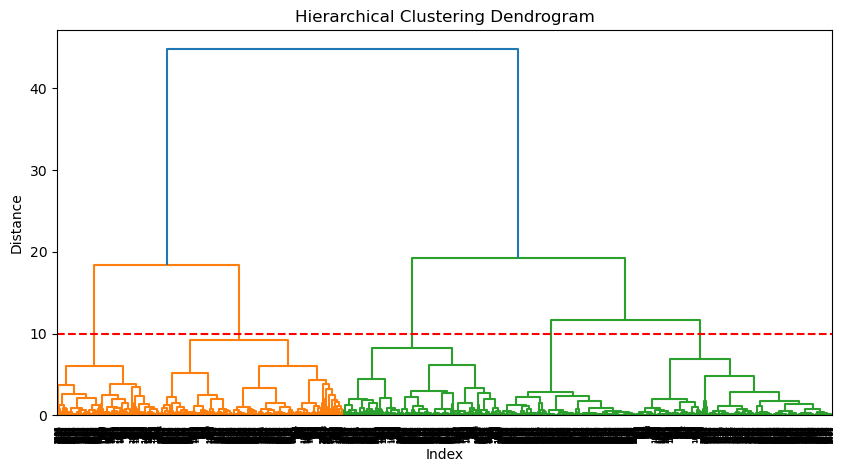

In [17]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(airlineData_scaled, method='ward',metric='euclidean'))
plt.axhline(y=10, color='r', linestyle='--') #with the distance 

###### Applying Agglomerative Clustering

In [18]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5,linkage='ward',affinity = "euclidean").fit(airlineData_scaled)
h_complete.fit_predict(airlineData_scaled)

array([1, 1, 1, ..., 0, 4, 4], dtype=int64)

###### Assigning the clusters to the dataset and saving it

In [35]:
cluster_labels=pd.Series(h_complete.labels_)
# creating a  new column and assigning it to new column
airlineData['clust']=cluster_labels
print(airlineData)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1      

###### Saving the dataset with the labels

In [37]:
airlineData.to_csv("airlineData_H-labeled.csv",encoding="utf-8")

#### Answer c

**Finding the Cluster Centroid for the Clustered Data**

In [28]:
import pandas as pd

# Read the already clustered data into a DataFrame
df = airlineData_scaled

# Assuming the 'cluster_label' column contains the cluster assignments
cluster_labels = df['clust'].unique()

# Calculate cluster centroids
centroid_list = []
for label in cluster_labels:
    cluster_points = df[df['clust'] == label]
    centroid = cluster_points.mean()
    centroid_list.append(centroid)

# Create a DataFrame to store the cluster centroids
centroid_df = pd.DataFrame(centroid_list)

# Print the cluster centroids DataFrame
print(centroid_df)


    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  0.025406    0.001929   0.000000   0.016815   0.000247     0.009718   
1  0.074773    0.014424   0.840654   0.000000   0.012617     0.222451   
2  0.062306    0.014466   0.549505   0.000619   0.006498     0.100340   
3  0.046836    0.025574   0.174947   0.012156   0.000000     0.045811   
4  0.017605    0.008796   0.000000   0.000000   0.000000     0.009680   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0     0.063660           0.005501         0.009873           0.595452    0.0   
1     0.258552           0.032161         0.056710           0.611313    1.0   
2     0.190277           0.006449         0.010531           0.526314    0.0   
3     0.141084           0.025374         0.044717           0.526908    1.0   
4     0.070949           0.011042         0.017896           0.188915    0.0   

   clust  
0    1.0  
1    3.0  
2    2.0  
3    0.0  
4    4.0  


###### Dividing the data into 2 sections based on the clusters and analyzing the segments

##### Cluster - 0

In [42]:
airlineData_0 = airlineData[(airlineData['clust'] == 0)]
print(airlineData_0)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
7       20856           0          1          1          1         5250   
8      443003           0          3          2          1         1753   
9      104860           0          3          1          1        28426   
17      13958           0          1          1          1         4291   
18      91473           0          3          1          1        27408   
...       ...         ...        ...        ...        ...          ...   
3987    11933           0          1          1          1          249   
3989     2622           0          1          1          1         1625   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
7               4      

**Checking distribution for 0 cluster members**

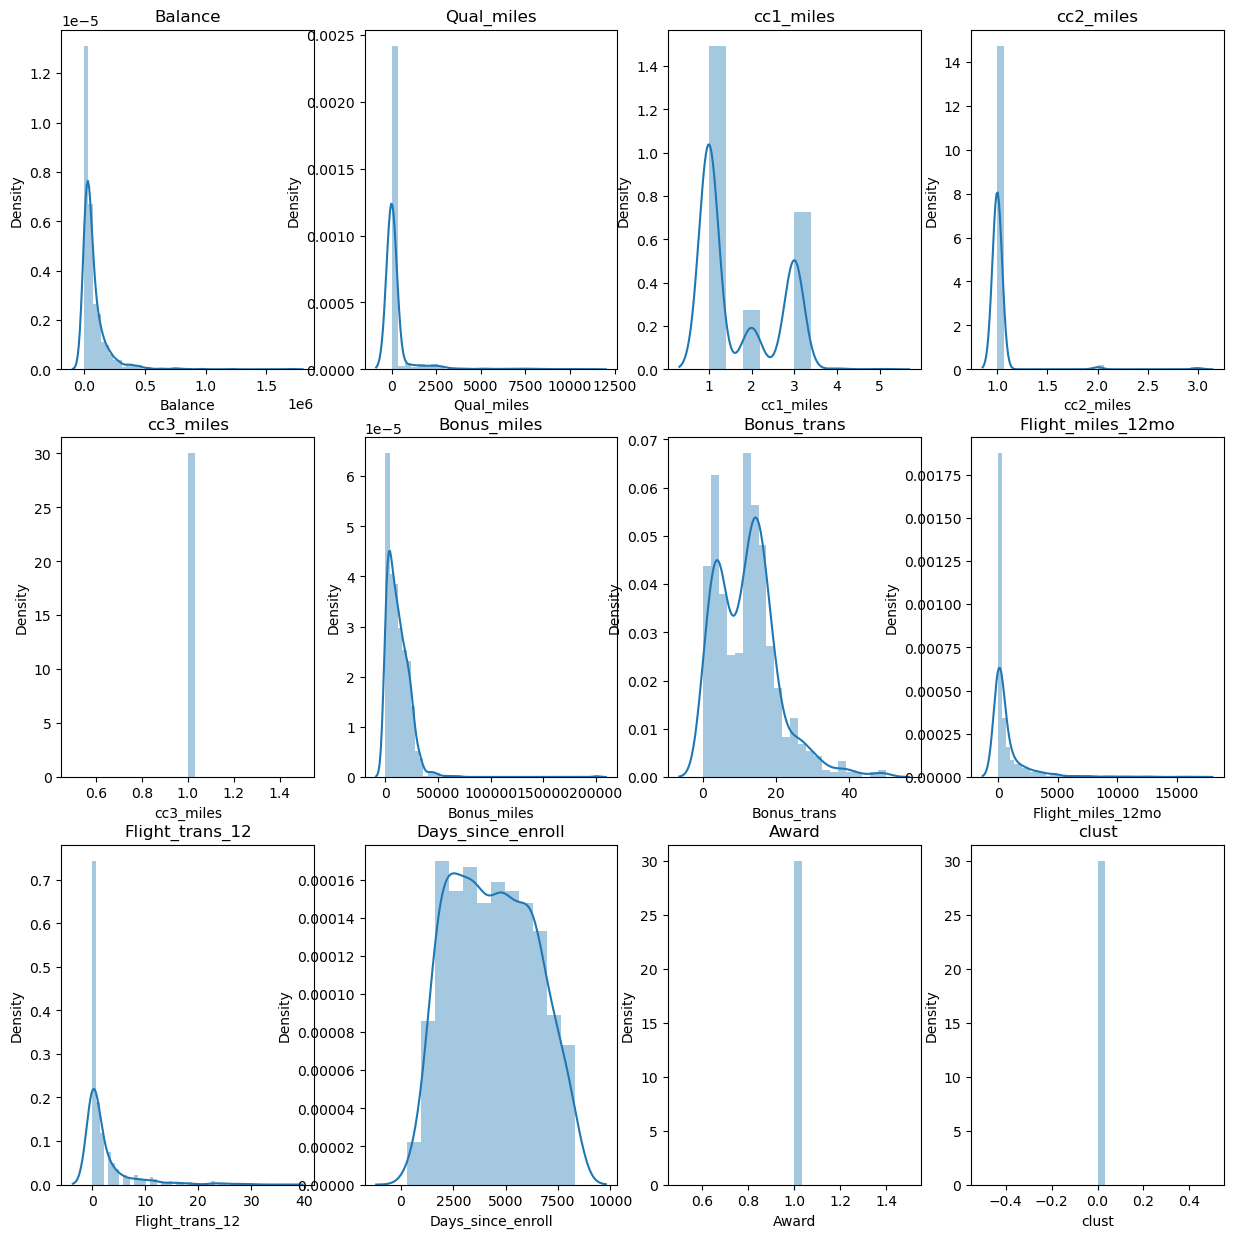

In [44]:
fig, axes = plt.subplots(nrows = 3, ncols = 4)    #3*4 array for plot
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, airlineData_0.columns):
  sns.distplot(airlineData_0[col], ax = ax)
  ax.set_title(col)

##### Cluster - 1

In [45]:
airlineData_1 = airlineData[(airlineData['clust'] == 1)]
print(airlineData_1)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
5       16420           0          1          1          1            0   
...       ...         ...        ...        ...        ...          ...   
3786    27669           0          1          1          1         3219   
3790    73159           0          1          1          1          358   
3793    38827           0          1          1          1            0   
3794    29919           0          1          1          1         1225   
3959    13942           0          1          2          1         5822   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1      

**Checking distribution for 1 cluster members**

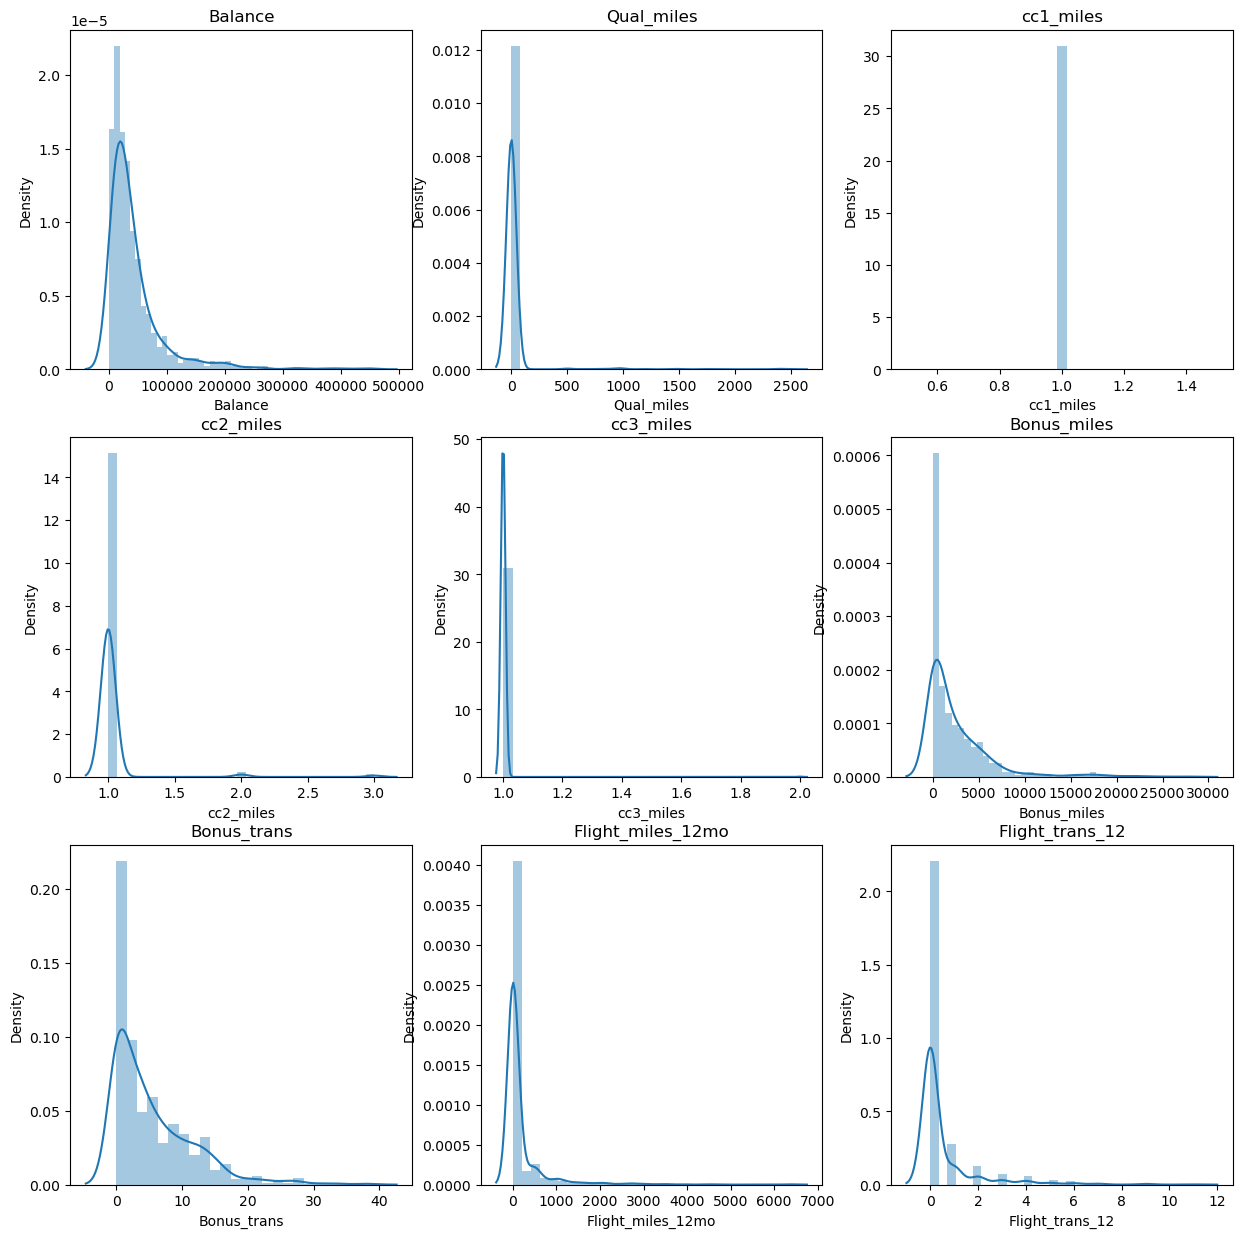

In [47]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)    #3*3 array for plot
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, airlineData_1.columns):
  sns.distplot(airlineData_1[col], ax = ax)
  ax.set_title(col)

##### Cluster - 2

In [48]:
airlineData_2 = airlineData[(airlineData['clust'] == 2)]
print(airlineData_2)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
6       84914           0          3          1          1        27482   
10      40091           0          2          1          1         7278   
12      43382           0          2          1          1        11150   
30     177926           0          3          1          1        20797   
32     276571           0          4          1          1        42044   
...       ...         ...        ...        ...        ...          ...   
3972    35185           0          2          1          1         5957   
3974    58387           0          3          1          1        14581   
3980    28867           0          3          1          1        19169   
3985    59017           0          4          1          1        34746   
3991    39142           0          3          1          1        14981   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
6              25      

**Checking distribution for 2 cluster members**

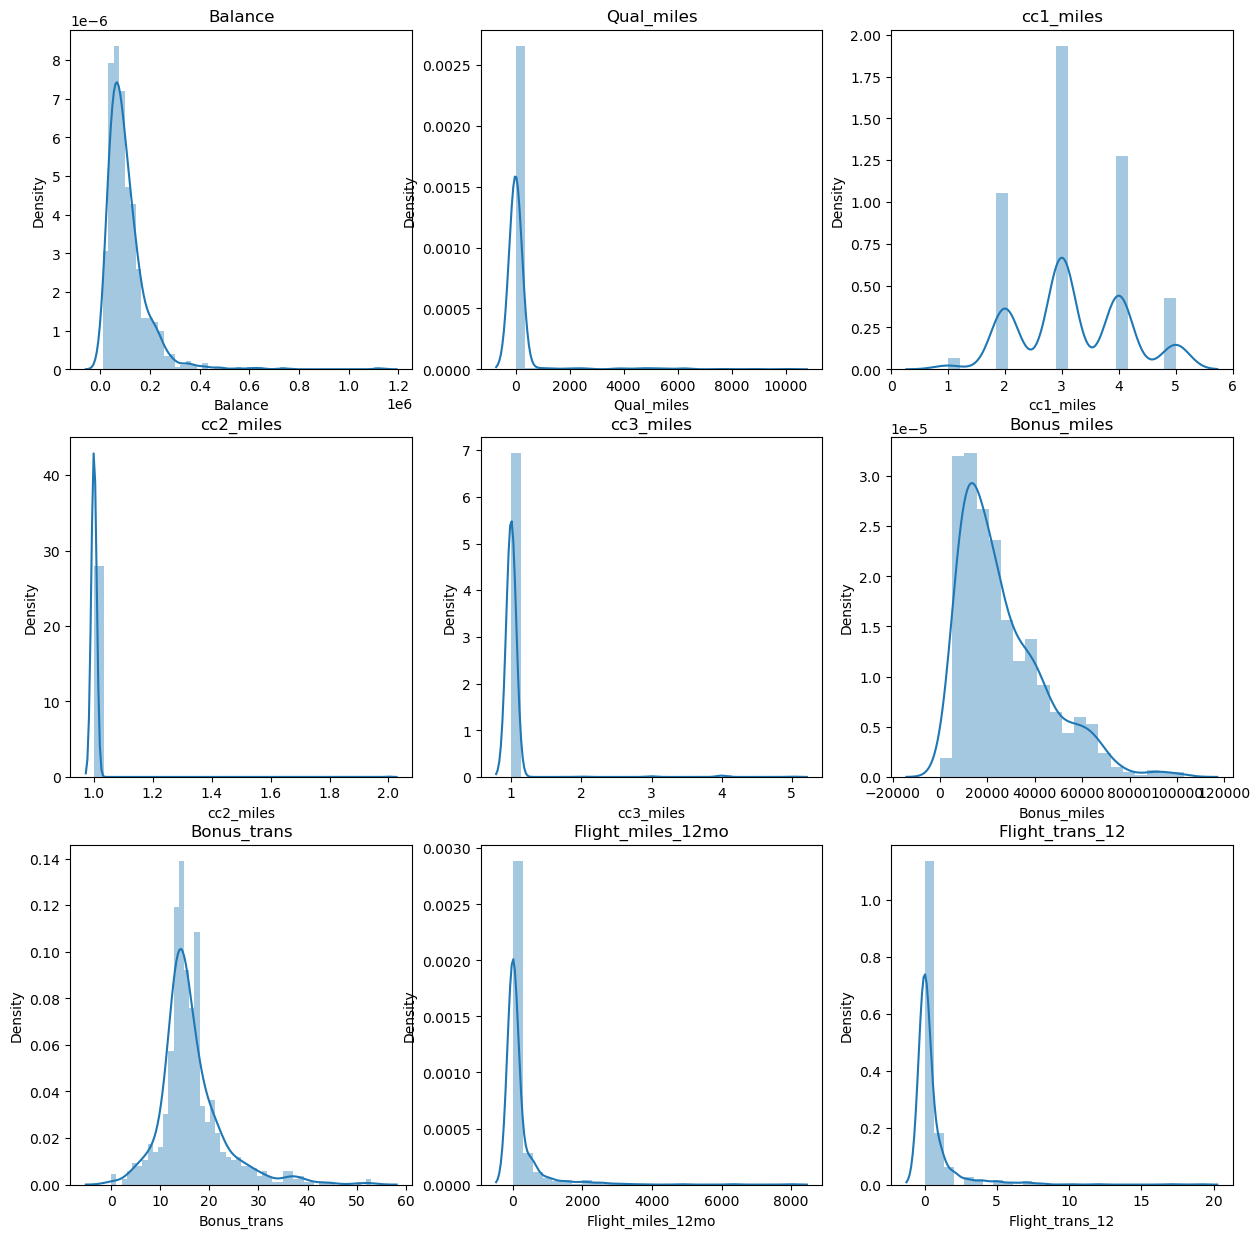

In [50]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)    #3*3 array for plot
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, airlineData_2.columns):
  sns.distplot(airlineData_2[col], ax = ax)
  ax.set_title(col)

##### Cluster - 3

In [51]:
airlineData_3 = airlineData[(airlineData ['clust'] == 3)]
print(airlineData_3)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4       97752           0          4          1          1        43300   
11      96522           0          5          1          1        61105   
15      28495           0          4          1          1        49442   
16      51890           0          4          1          1        48963   
20     120576           0          5          1          1        58831   
...       ...         ...        ...        ...        ...          ...   
3855   190730           0          5          1          1        78916   
3881    32424           0          4          1          1        39635   
3883   126167           0          5          1          1       190160   
3908    57642           0          4          1          1        52176   
3930    40424           0          4          1          1        44110   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
4              26      

**Checking distribution for 3 cluster members**

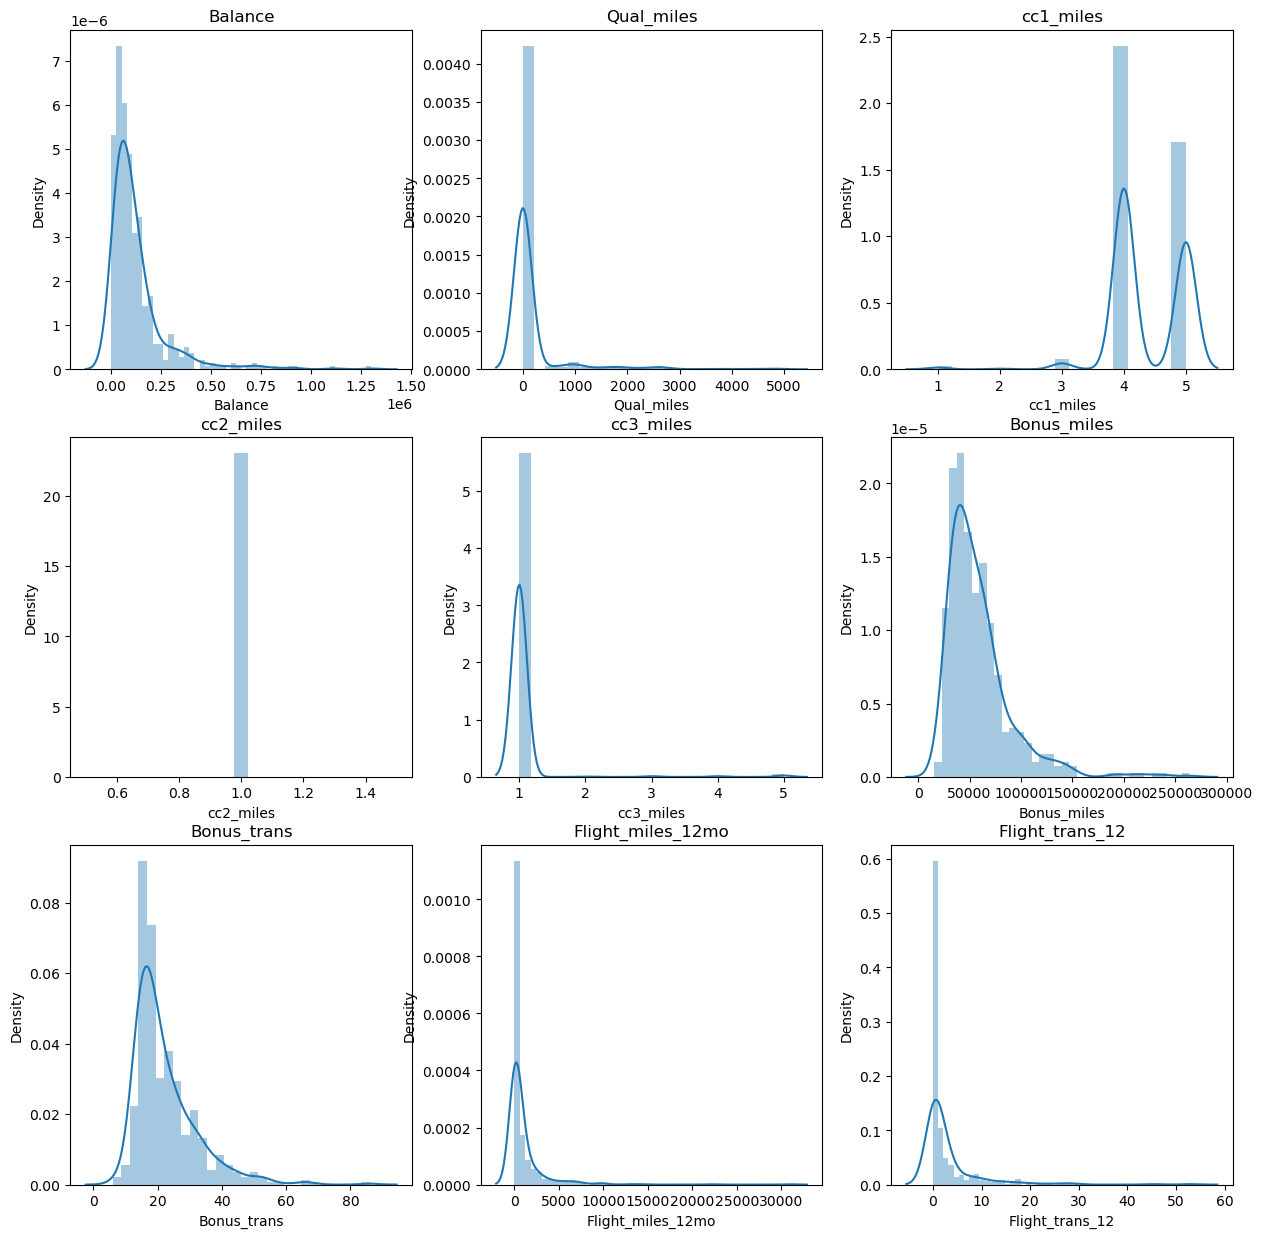

In [53]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)    #3*3 array for plot
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, airlineData_3.columns):
  sns.distplot(airlineData_3[col], ax = ax)
  ax.set_title(col)

##### Cluster - 4

In [54]:
airlineData_4 = airlineData[(airlineData ['clust'] == 4)]
print(airlineData_4)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
976     20498           0          1          1          1         7826   
1014    96827        1094          1          1          1        12100   
1122    27591           0          1          1          1         8209   
1129     1625           0          1          1          1         1375   
1236   146086           0          1          1          1         6950   
...       ...         ...        ...        ...        ...          ...   
3990    11310           0          1          1          1         5021   
3992    11181           0          1          1          1          929   
3993     3974           0          1          1          1          365   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
976            20      

**Checking distribution for 4 cluster members**

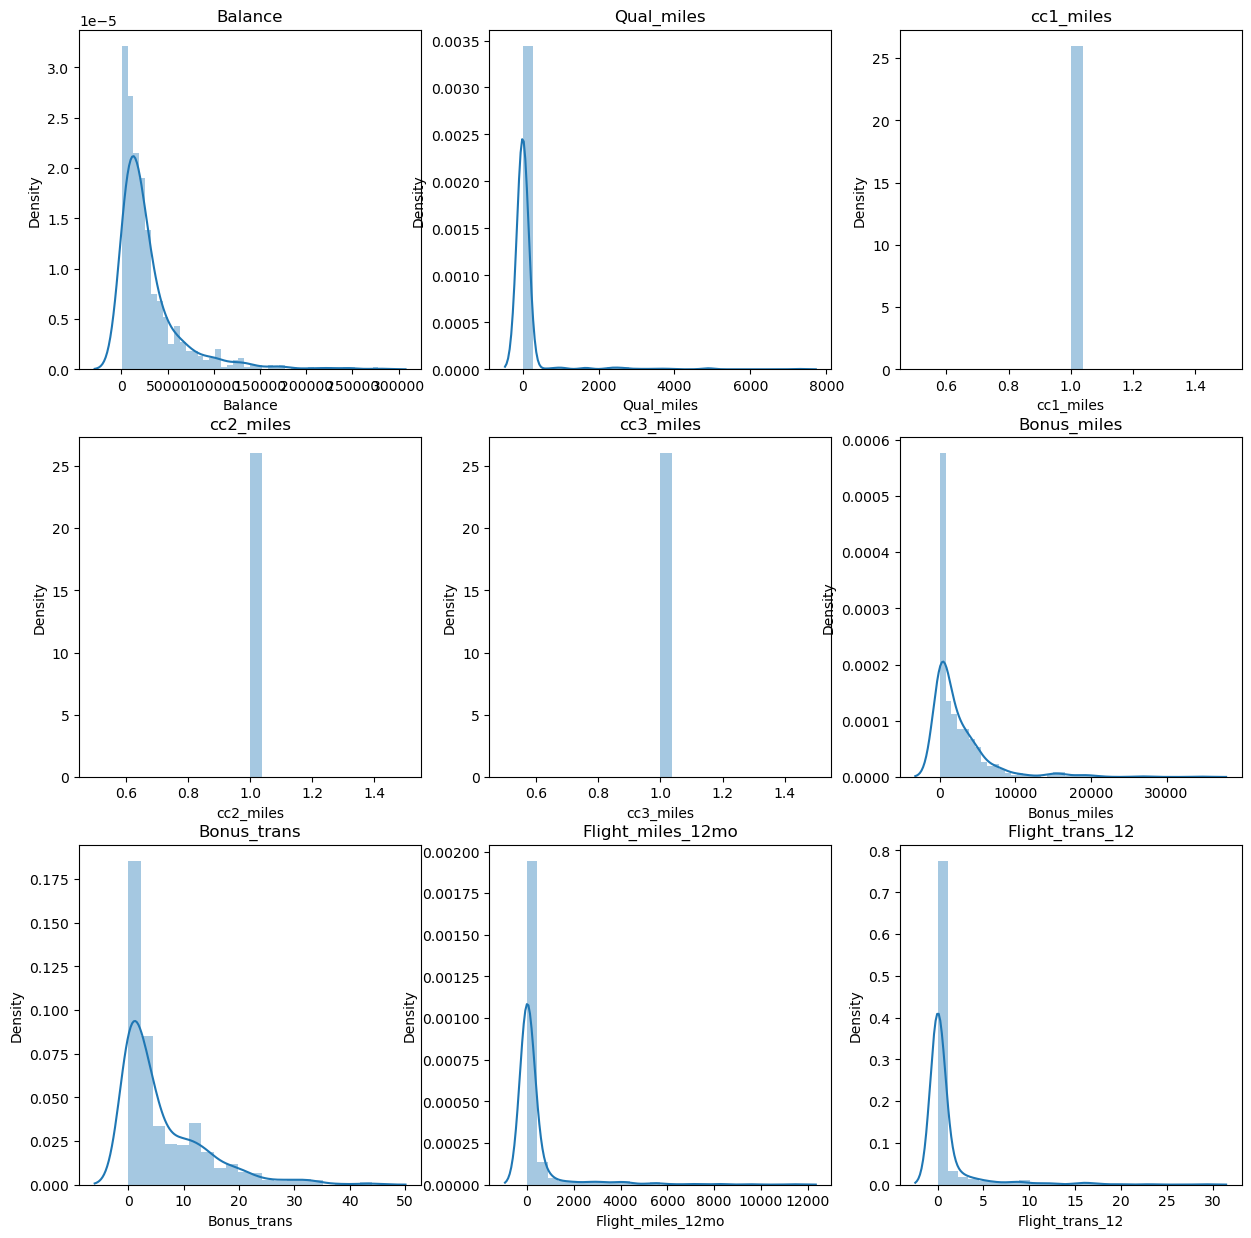

In [56]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)    #3*3 array for plot
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, airlineData_4.columns):
  sns.distplot(airlineData_4[col], ax = ax)
  ax.set_title(col)

#### Answer d

**Take a random sample of 95% Data**

In [58]:
import pandas as pd
import random

# Read the dataframe from a CSV file
df = airlineData_scaled

# Convert the dataframe to a list of tuples
data_tuples = [tuple(x) for x in df.values]

# Randomly select n rows using random.sample
n = 3800  # Number of rows to select
random_rows = random.sample(data_tuples, n)

# Convert the selected rows back to a dataframe
selected_df = pd.DataFrame(random_rows, columns=df.columns)

# Print the randomly selected rows
print(selected_df)


       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.042249         0.0       0.00        0.0        0.0     0.000000   
1     0.248434         0.0       0.00        0.0        0.0     0.032364   
2     0.044058         0.0       0.75        0.0        0.0     0.134752   
3     0.082994         0.0       1.00        0.0        0.0     0.239149   
4     0.071475         0.0       0.50        0.0        0.0     0.068718   
...        ...         ...        ...        ...        ...          ...   
3795  0.009650         0.0       0.00        0.0        0.0     0.034818   
3796  0.068769         0.0       0.00        0.0        0.0     0.004551   
3797  0.034702         0.0       0.00        0.0        0.0     0.009557   
3798  0.015673         0.0       0.00        0.0        0.0     0.003462   
3799  0.019682         0.0       0.75        0.0        0.0     0.103950   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.

**Making the dendogram again on the Subset data**

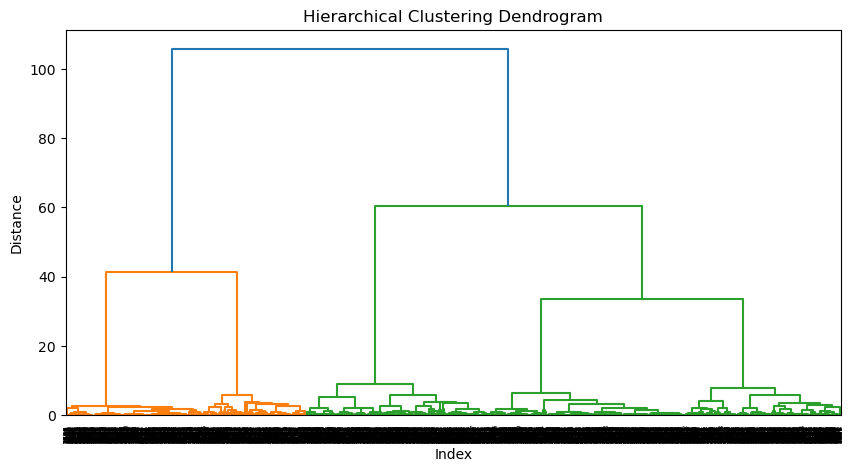

In [59]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(selected_df, method='ward',metric='euclidean'))

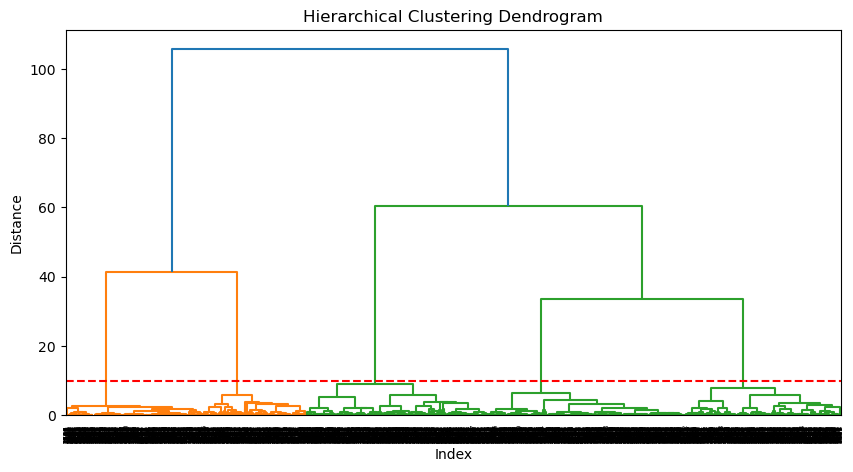

In [60]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(selected_df, method='ward',metric='euclidean'))
plt.axhline(y=10, color='r', linestyle='--') 

In [61]:
# Read the already clustered data into a DataFrame
df = selected_df

# Assuming the 'cluster_label' column contains the cluster assignments
cluster_labels = df['clust'].unique()

# Calculate cluster centroids
centroid_list = []
for label in cluster_labels:
    cluster_points = df[df['clust'] == label]
    centroid = cluster_points.mean()
    centroid_list.append(centroid)

# Create a DataFrame to store the cluster centroids
centroid_df = pd.DataFrame(centroid_list)

# Print the cluster centroids DataFrame
print(centroid_df)

    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  0.017296    0.008479   0.000000   0.000000   0.000000     0.009575   
1  0.025653    0.001901   0.000000   0.015658   0.000261     0.009725   
2  0.062132    0.014269   0.547017   0.000649   0.005837     0.099370   
3  0.075093    0.013323   0.839041   0.000000   0.013209     0.221703   
4  0.046967    0.024172   0.173401   0.011785   0.000000     0.045552   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0     0.069959           0.011275         0.017965           0.189009    0.0   
1     0.063298           0.005568         0.009966           0.594270    0.0   
2     0.188912           0.006488         0.010425           0.525730    0.0   
3     0.259022           0.033176         0.058302           0.612146    1.0   
4     0.140944           0.025141         0.044258           0.525535    1.0   

   clust  
0    4.0  
1    1.0  
2    2.0  
3    3.0  
4    0.0  


#### Answer e

#### K-Means Clustering

In [63]:
import threadpoolctl

In [78]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(airlineData_scaled)
    distortions.append(kmeanModel.inertia_)   

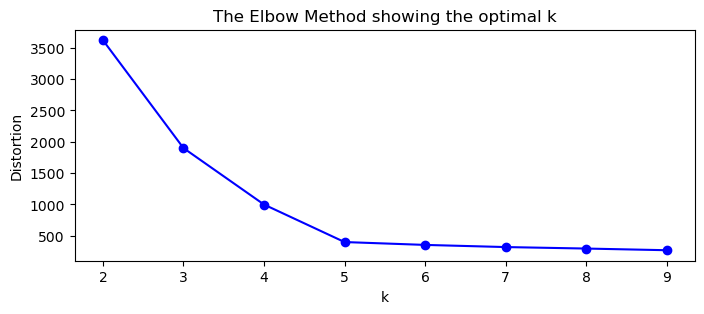

In [79]:
plt.figure(figsize=(8,3))
plt.plot(K, distortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

###### Taking number of clusters=6

In [88]:
kmeansModel = KMeans(n_clusters=6)
kmeansModel.fit(airlineData_scaled)
kmeansPredict= kmeansModel.predict(airlineData_scaled)

###### Getting the cluster labels

In [89]:
kmeansModel.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(kmeansModel.labels_)  # converting numpy array into pandas series object 
airlineData['clust-k']=md # creating a  new column and assigning it to new column 
airlineData.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust,clust-k
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,4


###### Applying same cluster labels for scaled data

In [82]:
airlineData_scaled['clust-k']=md 
airlineData_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust,clust-k
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1,4
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1,4
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1,4
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1,4
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,3,3


###### Saving the Clusters in the csv file

In [83]:
airlineData.to_csv("airlineData-labeled-kmeans.csv",encoding="utf-8")

###### Count the Cluster values

In [84]:
print('Count in each cluster: \n', airlineData['clust-k'].value_counts())

Count in each cluster: 
 4    1011
1     808
2     699
0     565
3     535
5     381
Name: clust-k, dtype: int64


In [139]:
fit = KMeans(n_clusters=6, max_iter = 10, random_state=0).fit(airlineData_scaled)
airlineDataWithClusterMembership = input
airlineDataWithClusterMembership['fit$cluster'] = fit.labels_
airlineDataWithClusterMembership.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,fit$cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [140]:
input = airlineDataWithClusterMembership
cluster1 = input.loc[input['fit$cluster']==0,]
cluster1.iloc[::,0] 
cluster2 = input.loc[input['fit$cluster']==1,]
cluster2.iloc[::,0] 
cluster3 = input.loc[input['fit$cluster']==2,]
cluster3.iloc[::,0]  
cluster4 = input.loc[input['fit$cluster']==3,]
cluster4.iloc[::,0] 
cluster5 = input.loc[input['fit$cluster']==4,]
cluster5.iloc[::,0] 
cluster6 = input.loc[input['fit$cluster']==5,]
cluster6.iloc[::,0] 

8       443003
9       104860
18       91473
19       23354
28       59763
         ...  
3954     33972
3973     72297
3978     10071
3979     57793
3996     73597
Name: Balance, Length: 381, dtype: int64

####  Answer f

In [141]:
#Aggregating columns on clusters
airlineDataWithClusterMembership.groupby('fit$cluster').agg({'Balance':'mean','Qual_miles':'mean','cc1_miles':'mean','cc2_miles':'mean','cc3_miles':'mean','Bonus_miles':'mean','Bonus_trans':'mean','Flight_miles_12mo':'mean','Flight_trans_12':'mean','Days_since_enroll':'mean','Award':'mean'}).T


fit$cluster,0,1,2,3,4,5
Balance,86644.465487,127475.028037,43313.653808,106221.111386,30013.416309,69769.832021
Qual_miles,317.892035,160.801869,21.506429,161.262376,98.054363,236.464567
cc1_miles,1.000000,4.362617,1.000000,3.198020,1.000000,2.737533
cc2_miles,1.037168,1.000000,1.033630,1.001238,1.000000,1.005249
cc3_miles,1.000000,1.050467,1.000989,1.025990,1.000000,1.000000
Bonus_miles,7768.736283,58656.919626,2562.614243,26458.257426,2552.569385,18472.784777
Bonus_trans,9.240708,22.235514,5.474777,16.363861,6.101574,16.422572
Flight_miles_12mo,1062.021239,991.110280,169.510386,198.733911,340.274678,366.595801
Flight_trans_12,3.290265,3.005607,0.523244,0.558168,0.948498,1.005249
Days_since_enroll,4335.472566,5072.226168,4940.680514,4367.250000,1568.864092,4426.598425


In [148]:
print(fit.labels_)  # A vector of integers (from 1:k) indicating the cluster to which each point is allocated.
print("Cluster Centers",'\n',fit.cluster_centers_) # A matrix of cluster centres.
print("Number of iterations",fit.n_iter_) # The number of (outer) iterations.
print("Total Cluster Sum of Squares",fit.inertia_) # Total cluster sum of squares, i.e. sum(withinss).


[2 2 2 ... 5 4 4]
Cluster Centers 
 [[ 5.08226972e-02  2.85156114e-02 -5.55111512e-17  1.85840708e-02
   2.16840434e-18  2.94621851e-02  1.07450093e-01  3.44621877e-02
   6.20804809e-02  5.22482827e-01  1.00000000e+00 -2.22044605e-16
  -3.10862447e-15]
 [ 7.47725168e-02  1.44242796e-02  8.40654206e-01  7.80625564e-18
   1.26168224e-02  2.22450726e-01  2.58552489e-01  3.21611539e-02
   5.67095750e-02  6.11312535e-01  1.00000000e+00  3.00000000e+00
   3.00000000e+00]
 [ 2.54063165e-02  1.92917378e-03 -2.77555756e-16  1.68150346e-02
   2.47279921e-04  9.71846803e-03  6.36602029e-02  5.50054794e-03
   9.87253420e-03  5.95452196e-01 -3.33066907e-16  1.00000000e+00
   4.00000000e+00]
 [ 6.23056920e-02  1.44655881e-02  5.49504950e-01  6.18811881e-04
   6.49752475e-03  1.00340396e-01  1.90277458e-01  6.44884028e-03
   1.05314777e-02  5.26314203e-01 -2.77555756e-16  2.00000000e+00
   1.00000000e+00]
 [ 1.76048494e-02  8.79569101e-03 -3.33066907e-16  1.73472348e-18
   3.46944695e-18  9.68037387e

###### Segmenting data based on clusters

In [150]:
kmeansairlineData_0 = airlineData[(airlineData ['clust-k'] == 0)]
kmeansairlineData_1 = airlineData[(airlineData ['clust-k'] == 1)]
kmeansairlineData_2 = airlineData[(airlineData ['clust-k'] == 2)]
kmeansairlineData_3 = airlineData[(airlineData ['clust-k'] == 3)]
kmeansairlineData_4 = airlineData[(airlineData ['clust-k'] == 4)]
kmeansairlineData_5 = airlineData[(airlineData ['clust-k'] == 5)]

##### Checking the distribution of data in each cluster

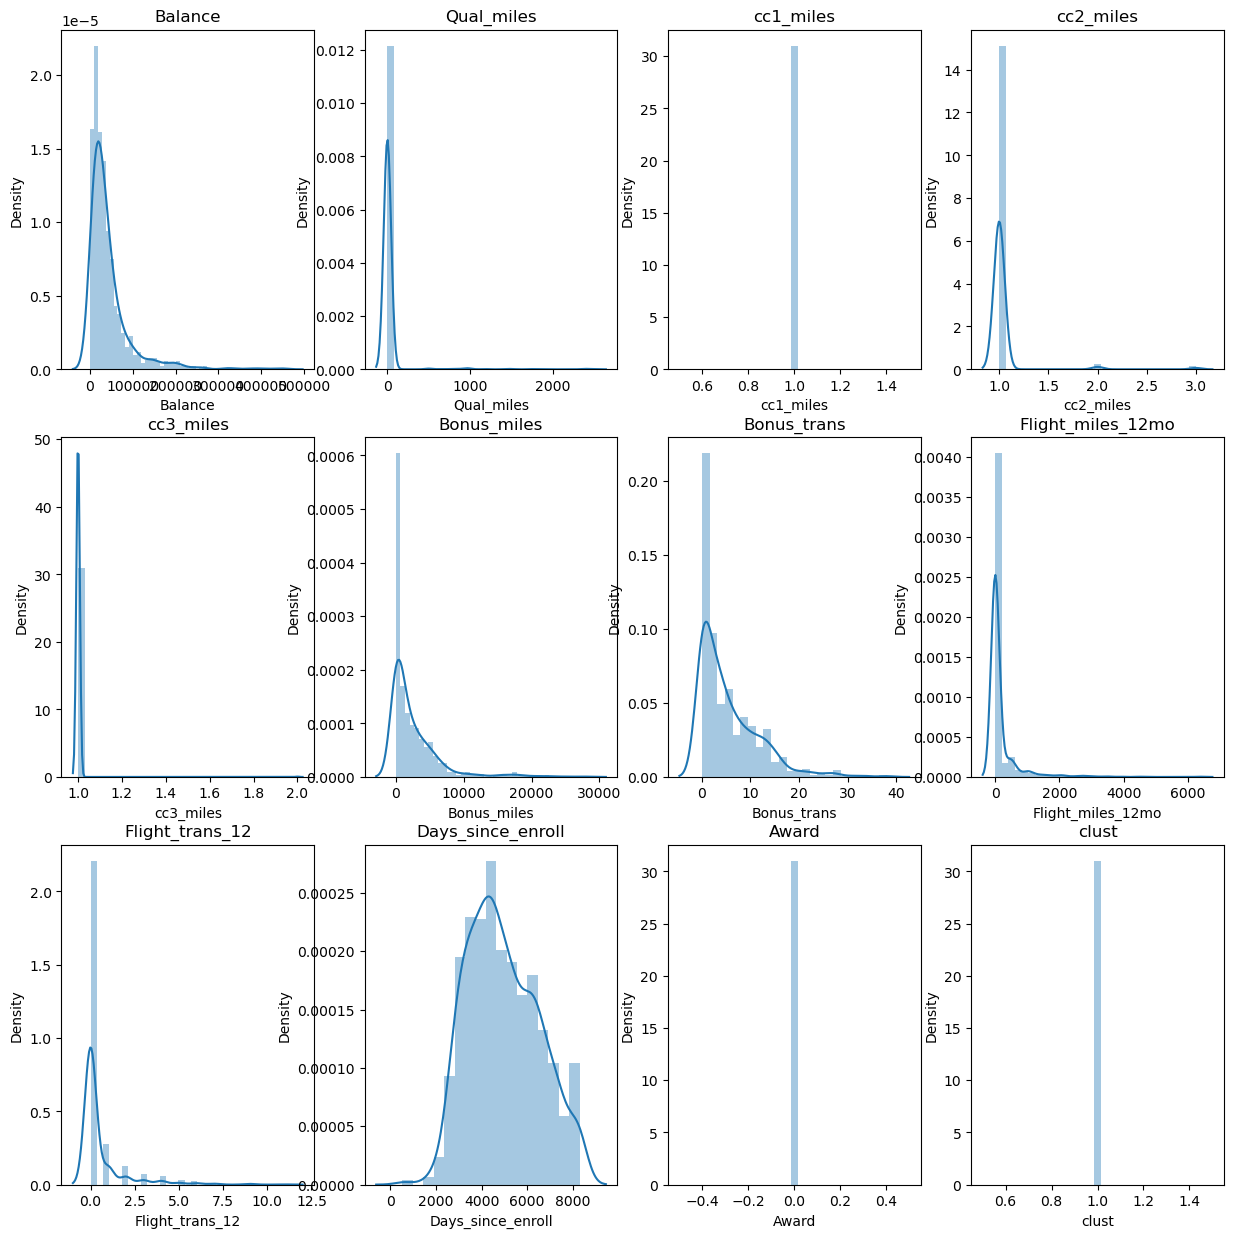

In [153]:
fig, axes = plt.subplots(nrows = 3, ncols = 4)    #3*4 array for plot
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, kmeansairlineData_0.columns):
  sns.distplot(kmeansairlineData_0[col], ax = ax)
  ax.set_title(col)

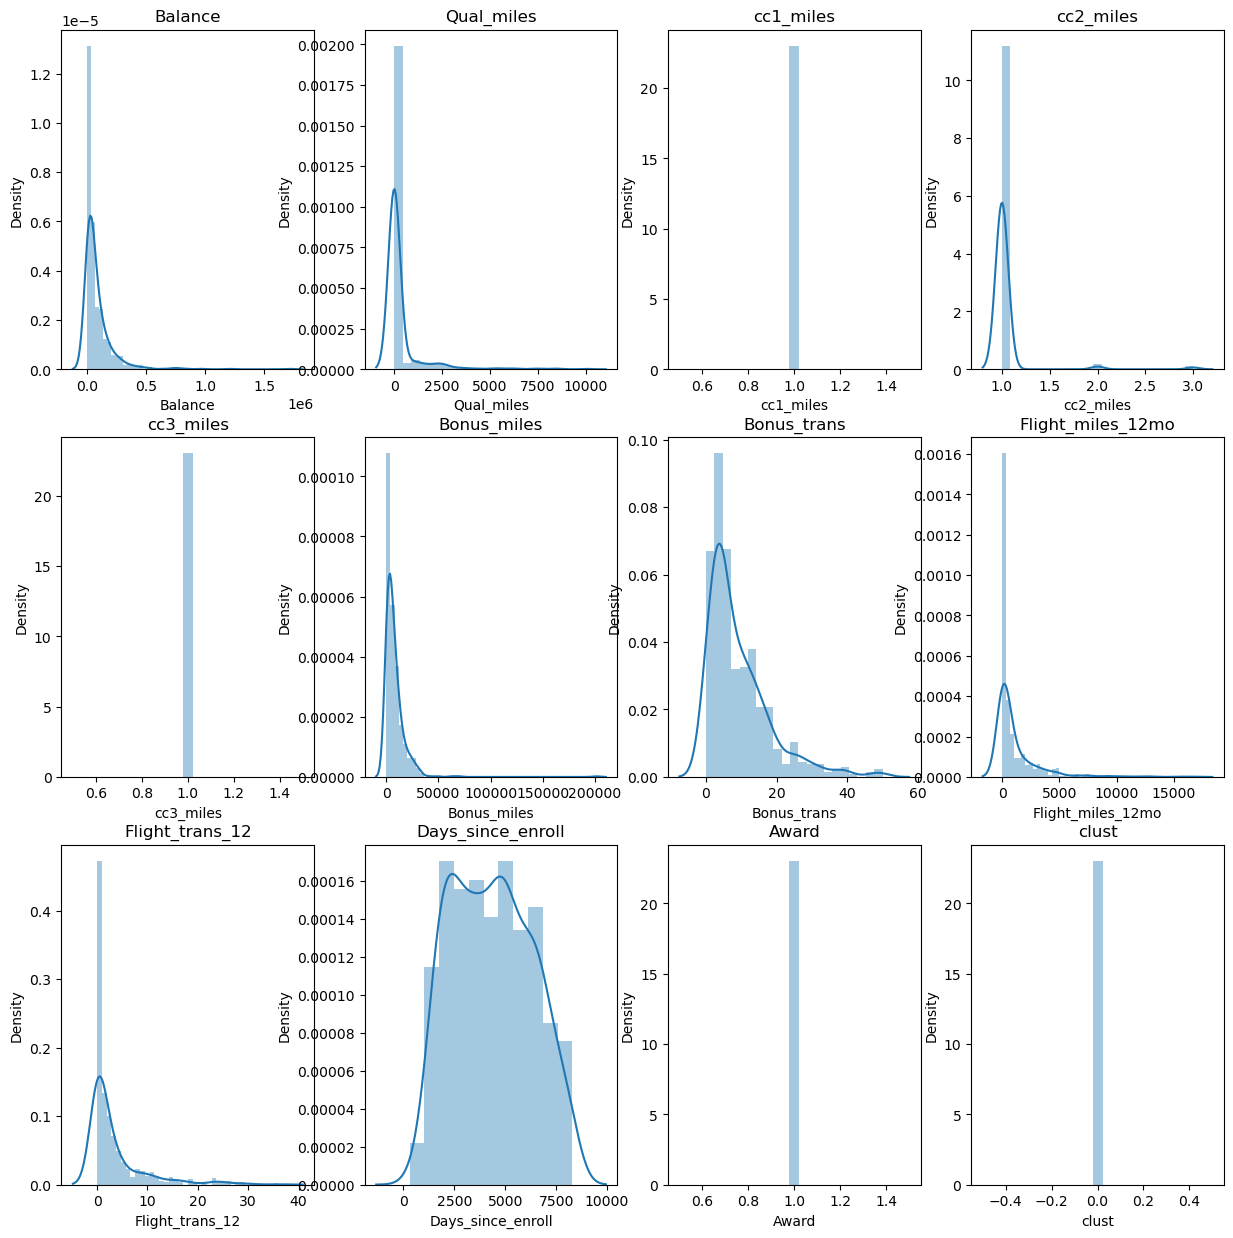

In [154]:
fig, axes = plt.subplots(nrows = 3, ncols = 4)    #3*4 array for plot
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, kmeansairlineData_1.columns):
  sns.distplot(kmeansairlineData_1[col], ax = ax)
  ax.set_title(col)

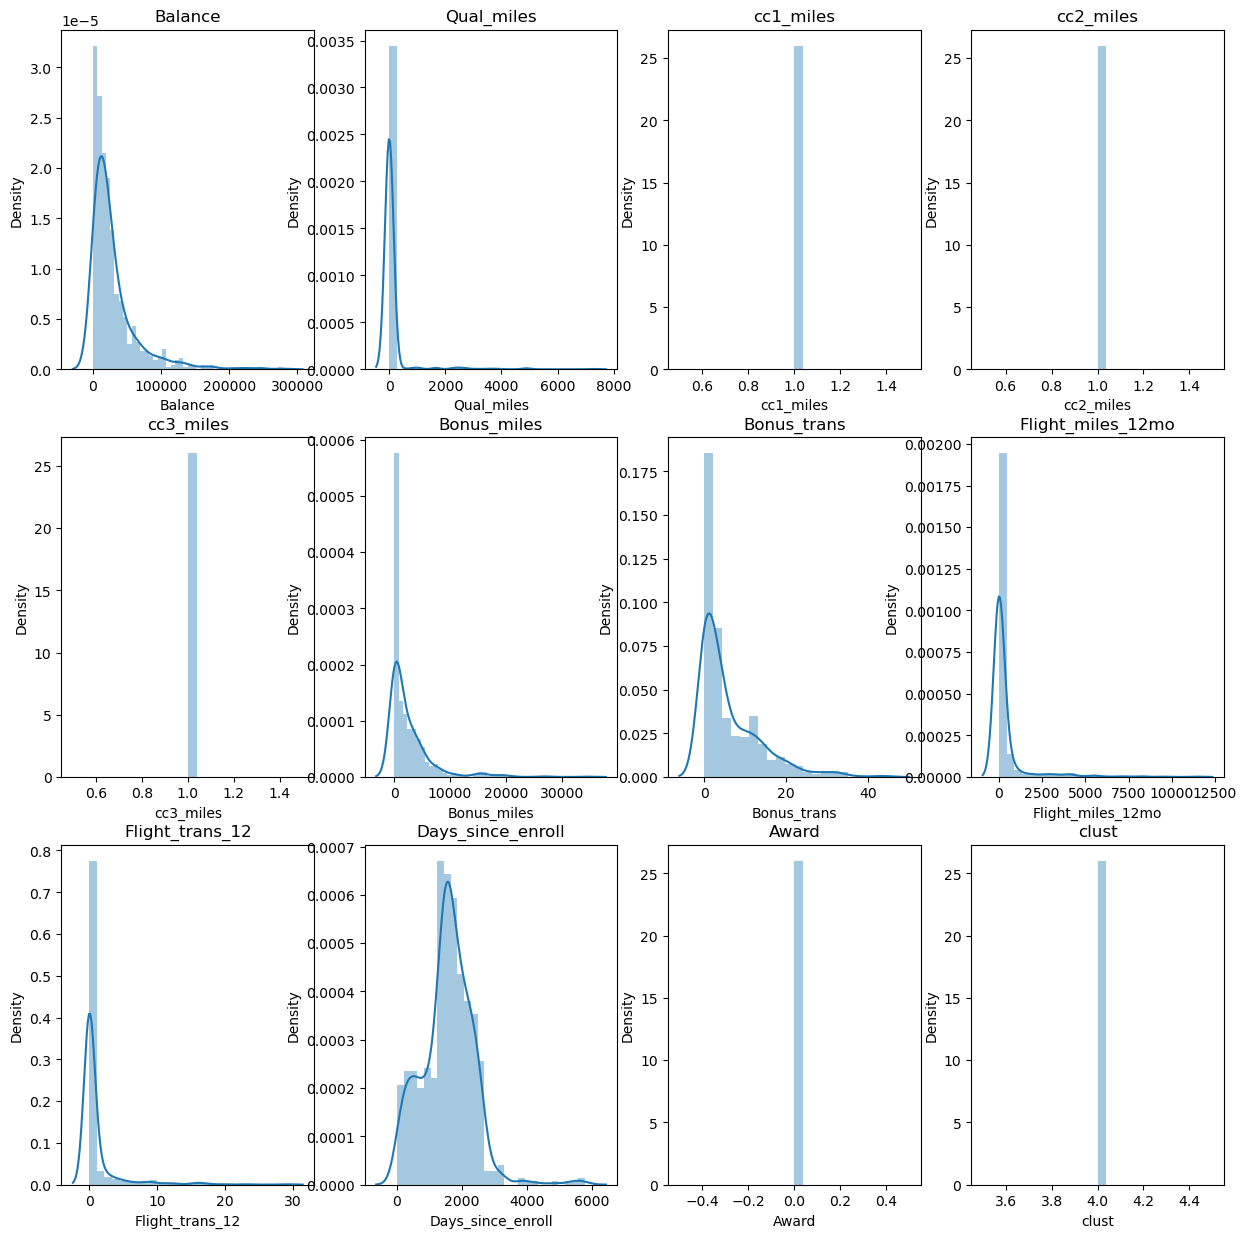

In [155]:
fig, axes = plt.subplots(nrows = 3, ncols = 4)    #3*4 array for plot
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, kmeansairlineData_2.columns):
  sns.distplot(kmeansairlineData_2[col], ax = ax)
  ax.set_title(col)

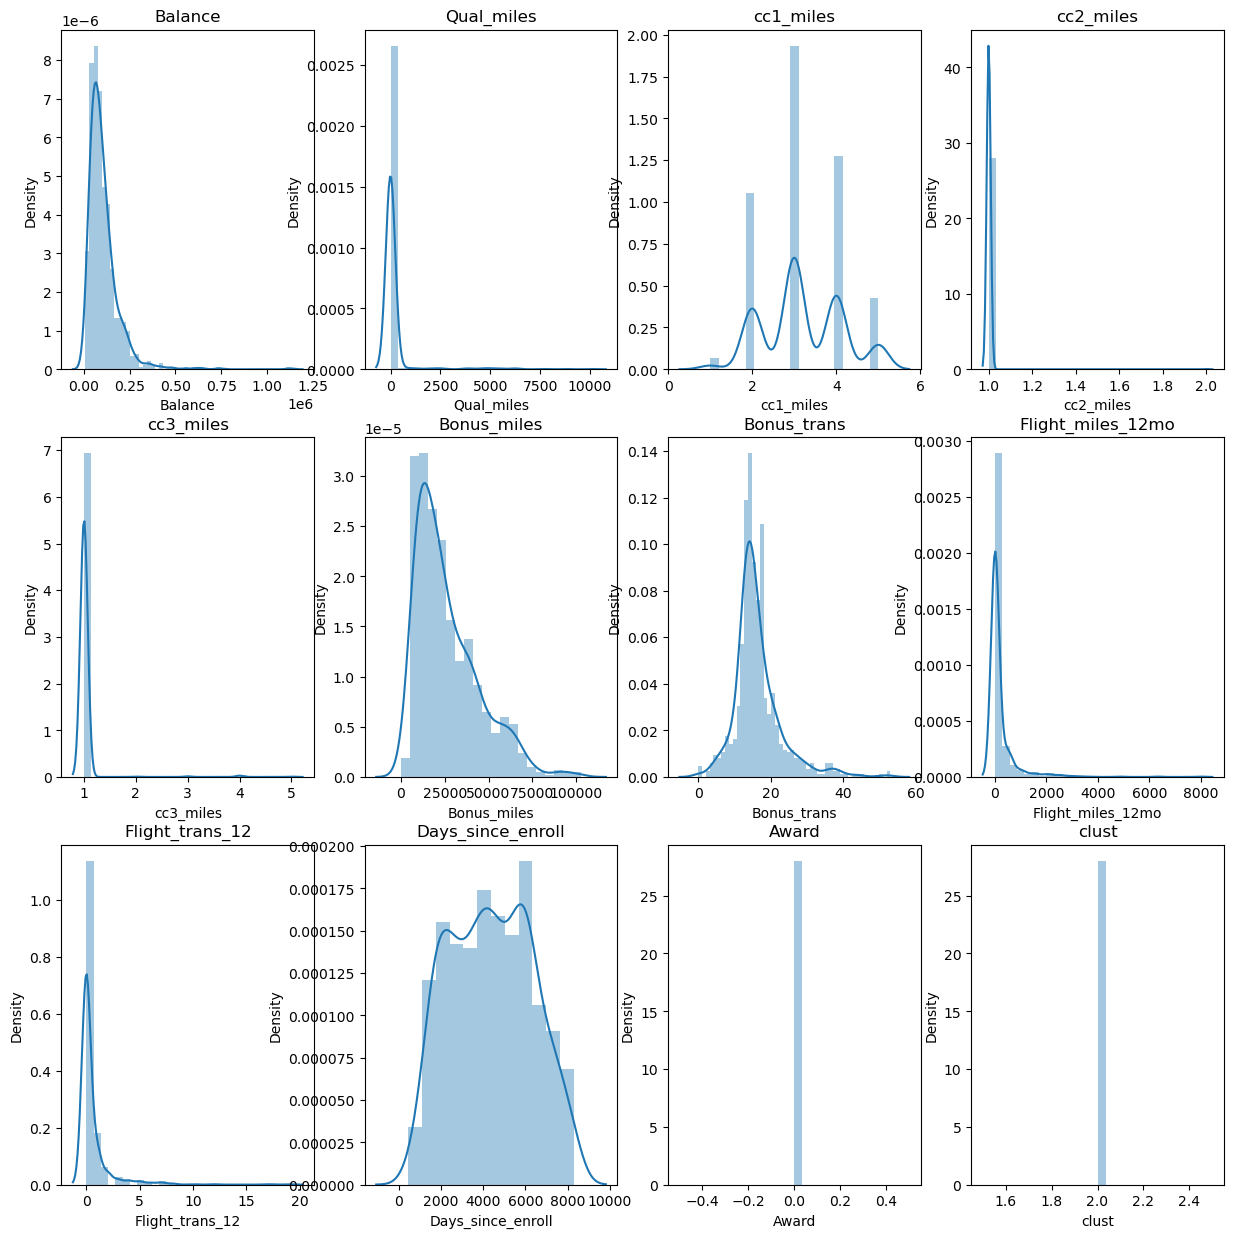

In [156]:
fig, axes = plt.subplots(nrows = 3, ncols = 4)    #3*4 array for plot
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, kmeansairlineData_3.columns):
  sns.distplot(kmeansairlineData_3[col], ax = ax)
  ax.set_title(col)

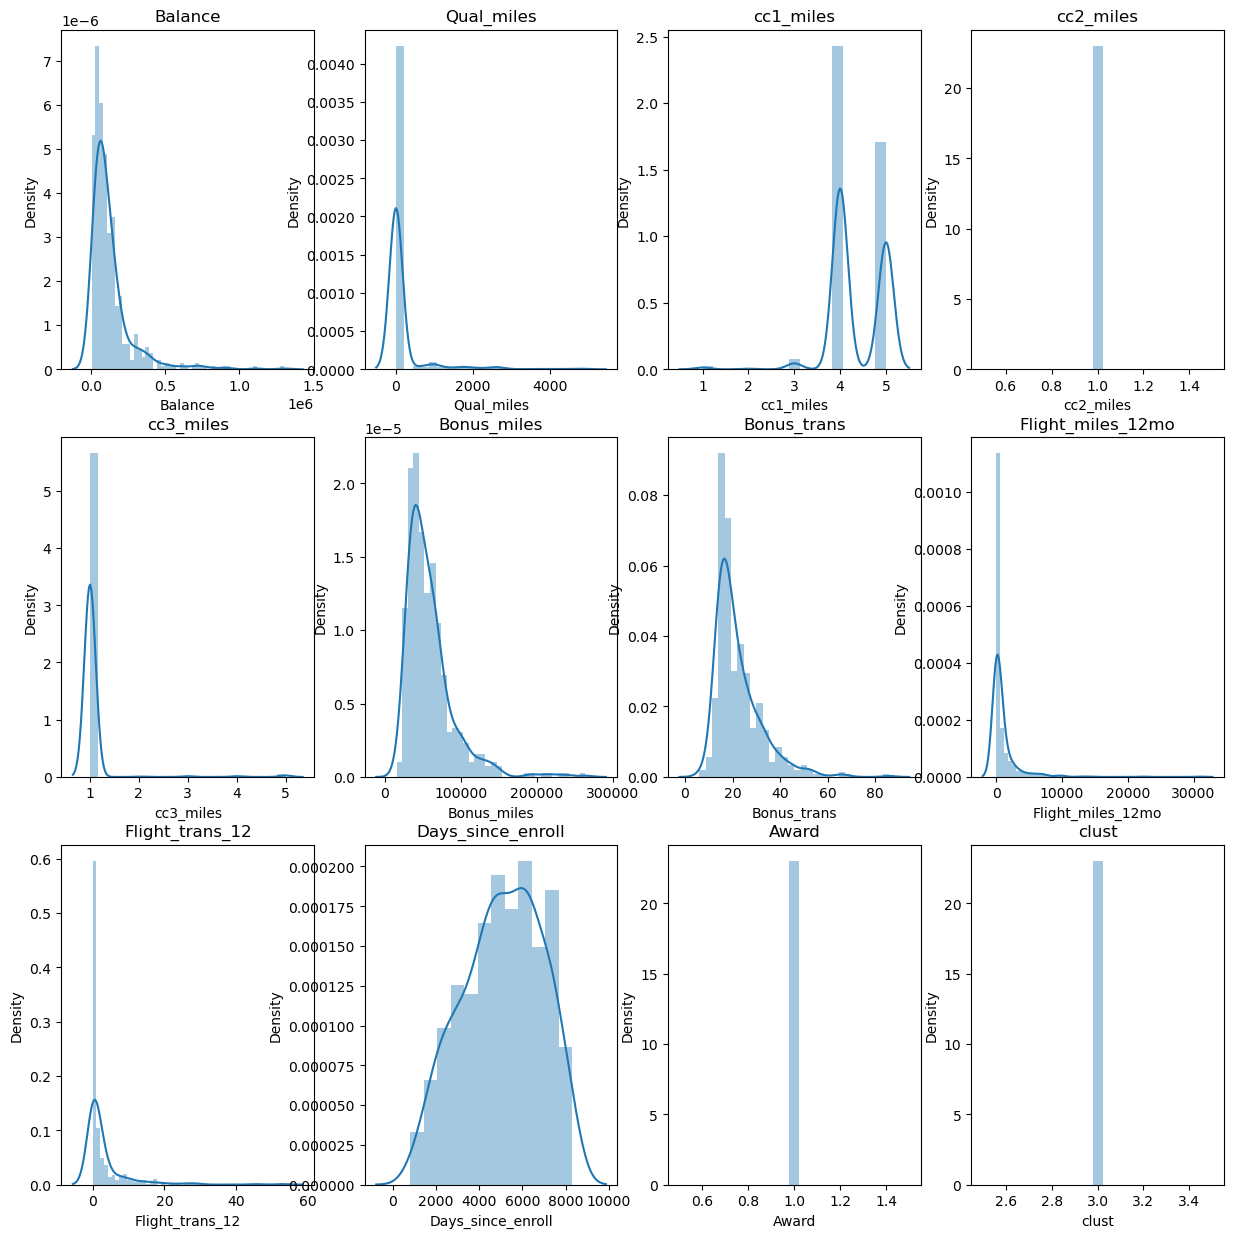

In [157]:
fig, axes = plt.subplots(nrows = 3, ncols = 4)    #3*4 array for plot
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, kmeansairlineData_4.columns):
  sns.distplot(kmeansairlineData_4[col], ax = ax)
  ax.set_title(col)

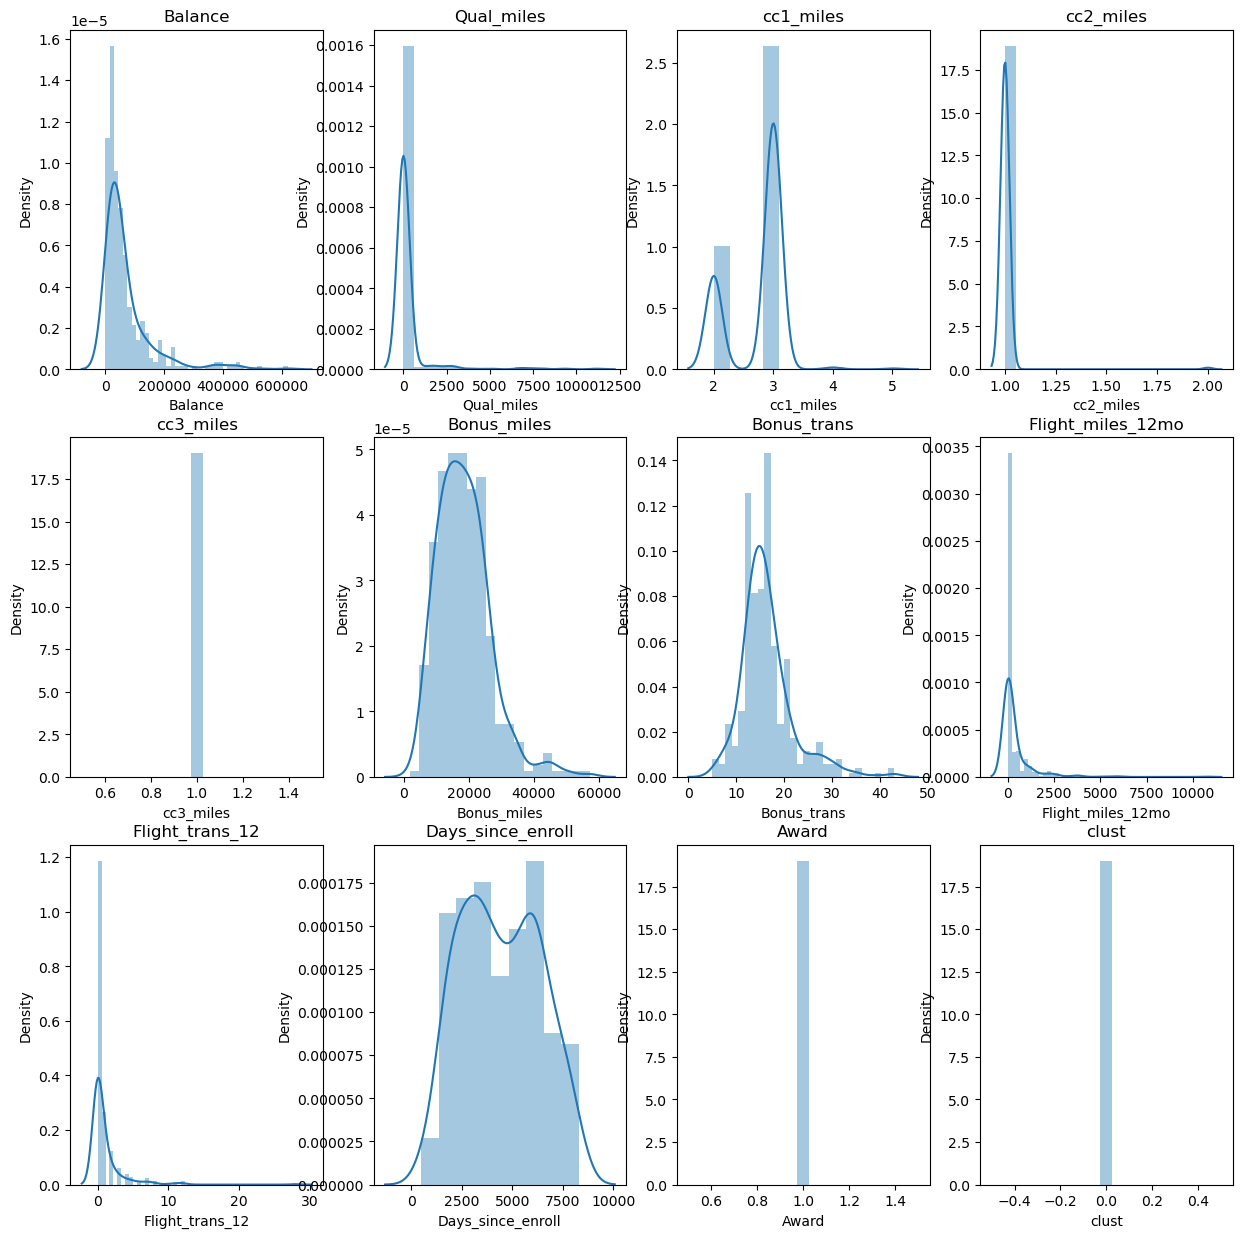

In [158]:
fig, axes = plt.subplots(nrows = 3, ncols = 4)    #3*4 array for plot
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, kmeansairlineData_5.columns):
  sns.distplot(kmeansairlineData_5[col], ax = ax)
  ax.set_title(col)